# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.003
0.0
-0.003
-0.004
-0.003
0.994
0.996
0.998
0.996
0.997
1.991
1.993
1.994
1.993
1.993
2.96
2.963
2.965
2.964
2.964
3.932
3.932
3.931
3.931
4.93
4.93
4.929
4.93
5.85
5.852
5.852
5.852
5.853
6.781
6.781
6.781
6.781
7.751
7.756
7.755
7.755
7.754
8.725
8.727
8.729
8.727
8.727
9.698
9.7
9.701
9.701
9.701
10.67
10.673
10.675
10.675
10.674
11.679
11.679
11.677
11.676
11.677
12.647
12.649
12.651
12.65
12.65
13.44
13.442
13.444
13.444
13.444
14.236
14.238
14.24
14.24
14.239
15.214
15.214
15.213
16.184
16.184
16.184
16.185
17.159
17.159
17.158
17.158
18.129
18.13
18.133
18.132
18.133
19.104
19.104
19.104
20.076
20.076
20.077
20.684
20.683
20.681
21.288
22.291
22.291
22.291
23.297
23.295
23.294
23.294
23.294
24.297
24.296
24.295
25.298
25.297
25.297
25.297
26.303
26.303
26.301
26.301
27.302
27.302
27.306
27.302
28.137
28.137
28.139
2

56.624
56.624
56.624
56.624
56.623
56.624
56.625
56.625
56.624
56.624
56.624
56.624
56.622
56.715
56.712
56.787
56.787
56.783
56.78
56.786
56.786
56.791
56.789
56.782
56.774
56.783
56.783
56.784
56.778
56.778
56.779
56.779
56.778
56.781
56.78
56.783
56.783
56.777
56.777
56.777
56.777
56.777
56.781
56.782
56.782
56.782
56.782
56.781
56.781
56.782
56.779
56.783
56.783
56.783
56.793
56.794
56.911
56.914
56.92
56.921
56.921
56.921
56.921
56.921
56.921
56.916
56.916
56.936
56.934
56.937
56.937
56.936
56.936
56.936
56.931
56.931
56.938
56.937
56.933
56.933
56.935
56.934
56.935
57.389
57.389
57.395
57.395
57.395
57.394
57.395
57.394
57.396
57.393
57.394
57.91
57.91
57.916
57.916
57.917
57.917
57.917
57.914
57.919
58.069
58.069
58.086
58.086
58.086
58.087
58.087
58.086
58.085
58.085
58.086
58.535
58.535
58.548
58.548
58.548
58.546
58.548
58.548
58.547
58.549
59.019
59.019
59.023
59.023
59.023
59.024
59.024
59.024
59.022
59.022
59.37
59.37
59.382
59.382
59.382
59.384
59.383
59.382
59.38
59.38
5

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1438,2876,59.369
1439,2878,59.371
1440,2880,59.369
1441,2882,59.367


<IPython.core.display.Javascript object>


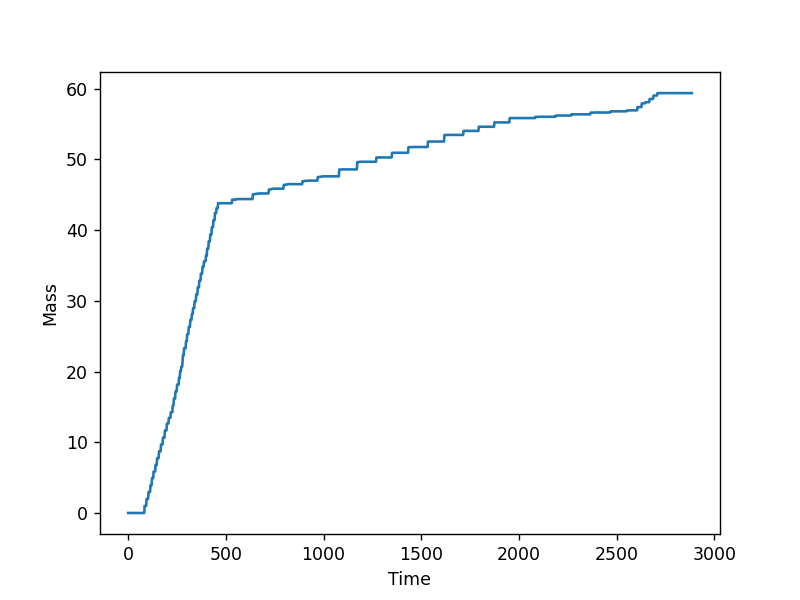

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_050623_S565-570.csv')